# **Importing dataset**

In [4]:
import pandas as pd

# Read in the dataset
data = pd.read_csv('Air_Quality.csv')
data

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16213,130750,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.10,NaN
16214,130780,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,Borough,5,Staten Island,2005,01/01/2005,2.30,NaN
16215,131020,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,2005-2007,01/01/2005,7.50,NaN
16216,131026,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2005-2007,01/01/2005,7.80,NaN


# **Showing the trends for each indicator over time**

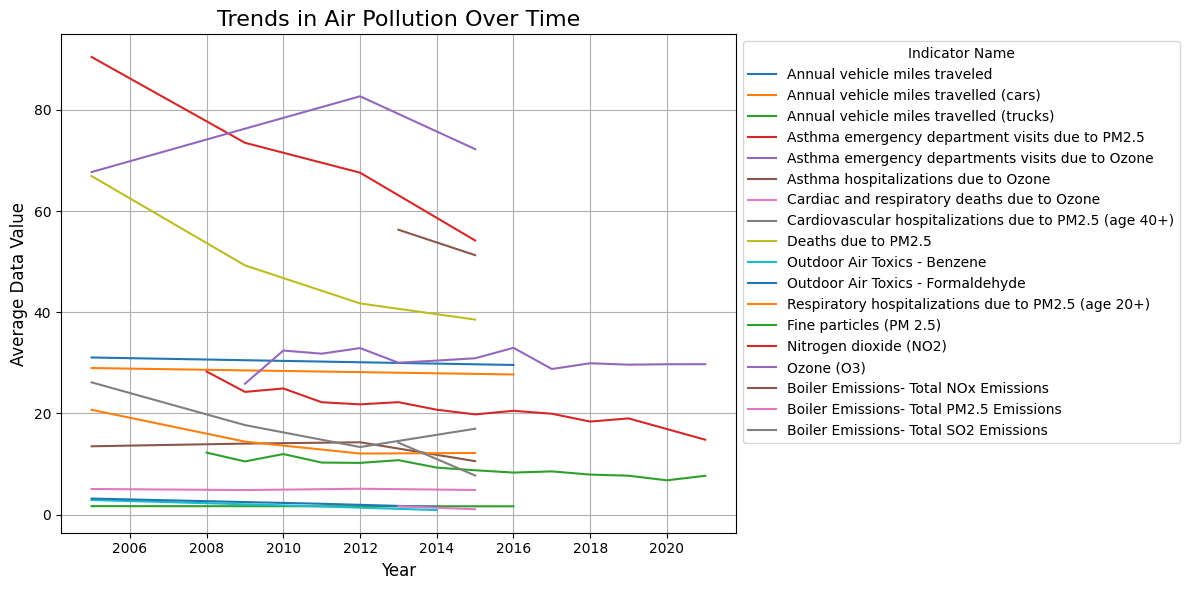

In [5]:
import matplotlib.pyplot as plt

# Convert Start_Date to datetime and extract the year
data['Start_Date'] = pd.to_datetime(data['Start_Date'], errors='coerce')
data['Year'] = data['Start_Date'].dt.year

# Group data by Year and Indicator Name to calculate average Data Value per year
trend_data = data.groupby(['Year', 'Name'])['Data Value'].mean().reset_index()

# Plot trends in air pollution over time for each indicator
plt.figure(figsize=(12, 6))
for indicator in trend_data['Name'].unique():
    indicator_data = trend_data[trend_data['Name'] == indicator]
    plt.plot(indicator_data['Year'], indicator_data['Data Value'], label=indicator)

# Customize plot
plt.title('Trends in Air Pollution Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Data Value', fontsize=12)
plt.legend(title='Indicator Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Most indicators seem to be reducing over time, indicating that the efficacy of pollution control measures might be improving

# **Indentifying the top 5 most polluted areas for each indicator**

In [6]:
# Group data by Geo Place Name and Indicator Name to calculate average pollution levels across all years
geo_trends = data.groupby(['Geo Place Name', 'Name'])['Data Value'].mean().reset_index()

# Identify geographical areas with the highest average pollution levels for each indicator
top_geo_areas = geo_trends.sort_values(by=['Name', 'Data Value'], ascending=[True, False]).groupby('Name').head(5)

for indicator in top_geo_areas['Name'].unique():
    print(f"\nIndicator: {indicator}")
    subset = top_geo_areas[top_geo_areas['Name'] == indicator]
    print(subset[['Geo Place Name', 'Data Value']].to_string(index=False))


Indicator: Annual vehicle miles traveled
                      Geo Place Name  Data Value
Stuyvesant Town and Turtle Bay (CD6)       78.20
         Gramercy Park - Murray Hill       73.60
               Upper East Side (CD8)       61.10
                  East Harlem (CD11)       60.75
 Lower East Side and Chinatown (CD3)       57.15

Indicator: Annual vehicle miles travelled (cars)
                      Geo Place Name  Data Value
Stuyvesant Town and Turtle Bay (CD6)       74.15
         Gramercy Park - Murray Hill       68.75
                  East Harlem (CD11)       58.20
               Upper East Side (CD8)       57.30
                         East Harlem       53.80

Indicator: Annual vehicle miles travelled (trucks)
                        Geo Place Name  Data Value
  Fordham and University Heights (CD5)        4.55
              Greenwich Village - SoHo        4.40
Fort Greene and Brooklyn Heights (CD2)        4.35
        Highbridge and Concourse (CD4)        4.05
      Greenwi

# **Analyzing which features are the most significant**

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical data
data_encoded = data.copy()
data_encoded['Geo Place Name'] = LabelEncoder().fit_transform(data_encoded['Geo Place Name'])
data_encoded['Name'] = LabelEncoder().fit_transform(data_encoded['Name'])

# Prepare data for regression
X = data_encoded[['Name', 'Geo Place Name', 'Year']].values  # Features: Pollutant, Region, Year
y = data_encoded['Data Value'].values  # Target: Pollution levels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor to analyze feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = model.feature_importances_
feature_names = ['Name', 'Region', 'Year']
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:\n", importance_df)


Feature Importances:
   Feature  Importance
0    Name    0.540667
1  Region    0.396387
2    Year    0.062945


# **Creating a model with all the features v.s using only the significant features**

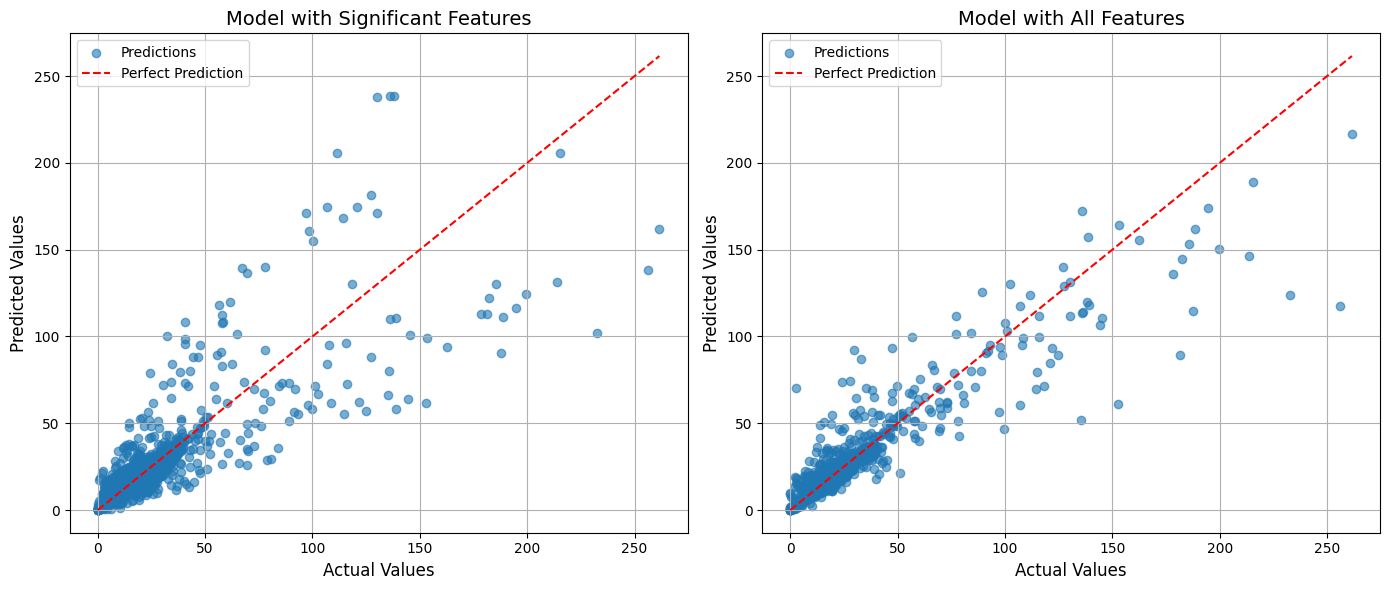

Model Performance Comparison:
                  Model       RMSE  R-squared (R²)
0  Significant Features  10.994525        0.700411
1          All Features   7.314147        0.867413


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Model with significant features only
X_significant = data_encoded[['Name', 'Geo Place Name', 'Year']].values  # Significant features
X_train_significant, X_test_significant, y_train_significant, y_test_significant = train_test_split(
    X_significant, y, test_size=0.2, random_state=42
)

# Train the model with significant features
model_significant = RandomForestRegressor(random_state=42)
model_significant.fit(X_train_significant, y_train_significant)

# Evaluate the significant features model
y_pred_significant = model_significant.predict(X_test_significant)
mse_significant = mean_squared_error(y_test_significant, y_pred_significant)
rmse_significant = np.sqrt(mse_significant)
r2_significant = model_significant.score(X_test_significant, y_test_significant)

# Model with all features
X_all = data_encoded[['Unique ID', 'Indicator ID', 'Name', 'Geo Place Name', 'Year']].values
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y, test_size=0.2, random_state=42
)

# Train the model with all features
model_all = RandomForestRegressor(random_state=42)
model_all.fit(X_train_all, y_train_all)

# Evaluate the all features model
y_pred_all = model_all.predict(X_test_all)
mse_all = mean_squared_error(y_test_all, y_pred_all)
rmse_all = np.sqrt(mse_all)
r2_all = model_all.score(X_test_all, y_test_all)

# Plot Actual vs Predicted for both models
plt.figure(figsize=(14, 6))

# Plot for significant features
plt.subplot(1, 2, 1)
plt.scatter(y_test_significant, y_pred_significant, alpha=0.6, label="Predictions")
plt.plot([min(y_test_significant), max(y_test_significant)],
         [min(y_test_significant), max(y_test_significant)],
         color="red", linestyle="--", label="Perfect Prediction")
plt.title("Model with Significant Features", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.grid(True)
plt.legend()

# Plot for all features
plt.subplot(1, 2, 2)
plt.scatter(y_test_all, y_pred_all, alpha=0.6, label="Predictions")
plt.plot([min(y_test_all), max(y_test_all)],
         [min(y_test_all), max(y_test_all)],
         color="red", linestyle="--", label="Perfect Prediction")
plt.title("Model with All Features", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Display performance comparison
performance_comparison = pd.DataFrame({
    "Model": ["Significant Features", "All Features"],
    "RMSE": [rmse_significant, rmse_all],
    "R-squared (R²)": [r2_significant, r2_all]
})

print("Model Performance Comparison:")
print(performance_comparison)


Conclusion: The model using all of the features performs better as it has a lower RMSE and greater R-squared. This could be because features like Unique ID or Indicator ID may carry indirect or implicit information that the model leverages, the dataset might contain complex, non-linear interactions between features, including more features might reduce information loss due to redundancy, and a few other reasons